## CAPSTONE: Stroke Prediction

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data
df = pd.read_csv("stroke3.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,4,1,228.69,36.60,2,1
1,1,61.0,0,0,1,3,0,202.21,28.89,1,1
2,0,80.0,0,1,1,4,0,105.92,32.50,1,1
3,1,49.0,0,0,1,4,1,171.23,34.40,3,1
4,1,79.0,1,0,1,3,0,174.12,24.00,1,1


In [3]:
# Null value count
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Logistic Regression

In [4]:
# Set up basic linear regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Setup LogReg

from sklearn.model_selection import train_test_split

# Set train and test groups
train, test = train_test_split(df, test_size = 0.2)

print('TRAIN SET:',train.shape)
print('TEST SET:',test.shape)

TRAIN SET: (4087, 11)
TEST SET: (1022, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.2 KB


In [6]:
# IDENTIFY FEATURES / INPUT / HYPOTHESIS / INDEPENDENT VARIABLE
train_feat = train.iloc[:,:10]

# IDENTIFY TARGET / OUTPUT / CONCLUSION / DEPENDENT VARIABLE
train_targ = train['stroke']

# TURN ON MACHINE LEARNING TRAINING SET
lr.fit(train_feat, train_targ)

C:\Users\smirs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Logistic regression result
test_feat = test.iloc[:,:10]
test_targ = test ['stroke']
print("Logistic Regression Prediction:",round((lr.score( test_feat, test_targ) * 100),3),"%")

Logistic Regression Prediction: 95.597 %


In [8]:
# Predictions

lr.predict(test_feat)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
# import confusion matrix
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(lr.predict(test_feat), test_targ)
cf_matrix

array([[977,  45],
       [  0,   0]], dtype=int64)

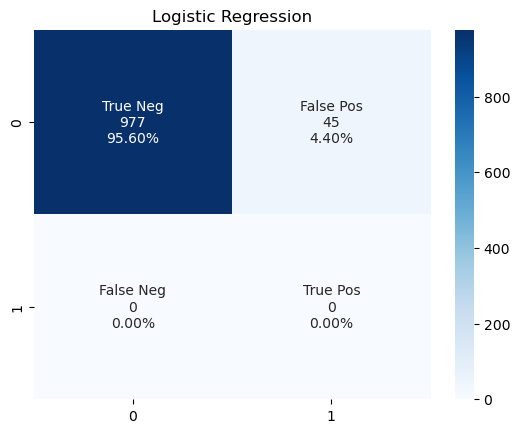

In [10]:
# CONFUSION MATRIX VISUALIZATION [COMPLEX]

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
plt.title('Logistic Regression')
plt.show()

In [11]:
# PLOTTING FEATURE IMPORTANCE
# get importance
importance = lr.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.20148
Feature: 1, Score: 0.06833
Feature: 2, Score: 0.17229
Feature: 3, Score: 0.38677
Feature: 4, Score: -0.49795
Feature: 5, Score: 0.05656
Feature: 6, Score: 0.09070
Feature: 7, Score: 0.00431
Feature: 8, Score: -0.00026
Feature: 9, Score: 0.02716


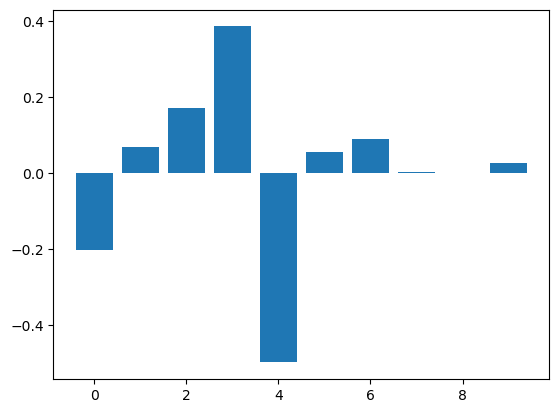

In [12]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Logistic Regression: Age<25y Dropped

In [13]:
# DROP THEM BABIES

df3 = df[df['age'] >= 25]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3873 non-null   int64  
 1   age                3873 non-null   float64
 2   hypertension       3873 non-null   int64  
 3   heart_disease      3873 non-null   int64  
 4   ever_married       3873 non-null   int64  
 5   work_type          3873 non-null   int64  
 6   Residence_type     3873 non-null   int64  
 7   avg_glucose_level  3873 non-null   float64
 8   bmi                3873 non-null   float64
 9   smoking_status     3873 non-null   int64  
 10  stroke             3873 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 363.1 KB


In [14]:
df3.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000
mean,0.601859,53.073845,0.127033,0.071004,0.853860,3.472502,0.510457,109.944854,30.672259,1.391170,0.063775
std,0.489578,16.019833,0.333053,0.256865,0.353292,0.756057,0.499955,49.177952,7.018102,1.000307,0.244383
min,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,55.220000,11.300000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,1.000000,3.000000,0.000000,77.550000,26.100000,1.000000,0.000000
50%,1.000000,53.000000,0.000000,0.000000,1.000000,4.000000,1.000000,92.820000,29.200000,1.000000,0.000000
75%,1.000000,65.000000,0.000000,0.000000,1.000000,4.000000,1.000000,118.210000,34.100000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,3.000000,1.000000


In [15]:
# Set up basic logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Setup LogReg

from sklearn.model_selection import train_test_split

# SET TRAIN, TEST GROUPS
train, test = train_test_split(df3, test_size = 0.2)

# "Test" is also the hold-out because it is removed and then accuracy is measured based on that

print('TRAIN SET:',train.shape)
print('TEST SET:',test.shape)

TRAIN SET: (3098, 11)
TEST SET: (775, 11)


In [16]:
# IDENTIFY FEATURES / INPUT / HYPOTHESIS / INDEPENDENT VARIABLE
train_feat = train.iloc[:,:10]

# IDENTIFY TARGET / OUTPUT / CONCLUSION / DEPENDENT VARIABLE
train_targ = train['stroke']

# TURN ON MACHINE LEARNING TRAINING SET
lr.fit(train_feat, train_targ)

C:\Users\smirs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# LOGISTIC REGRESSION RESULT

test_feat = test.iloc[:,:10]
test_targ = test ['stroke']
print("Logistic Regression Prediction:",round((lr.score( test_feat, test_targ) * 100),3),"%")

Logistic Regression Prediction: 93.548 %


In [18]:
cf_matrix2 = confusion_matrix(lr.predict(test_feat), test_targ)
cf_matrix2

array([[725,  49],
       [  1,   0]], dtype=int64)

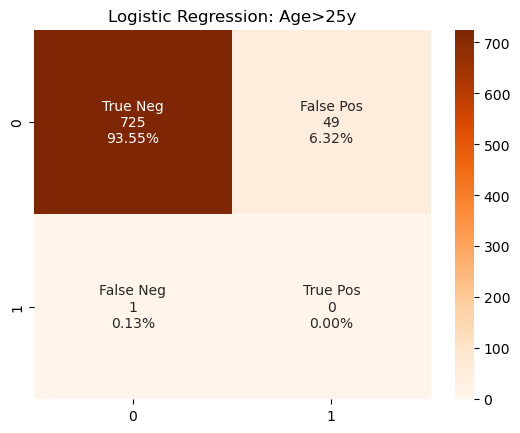

In [19]:
# CONFUSION MATRIX VISUALIZATION [COMPLEX]

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix2.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix2, annot = labels, fmt = '', cmap = 'Oranges')
plt.title('Logistic Regression: Age>25y')
plt.show()

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,4,1,228.69,36.60,2,1
1,1,61.0,0,0,1,3,0,202.21,28.89,1,1
2,0,80.0,0,1,1,4,0,105.92,32.50,1,1
3,1,49.0,0,0,1,4,1,171.23,34.40,3,1
4,1,79.0,1,0,1,3,0,174.12,24.00,1,1


In [22]:
# Split data into features and target
X = df.drop('stroke', axis=1)
y = df['stroke']


In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [25]:
# Fit the model to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [27]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.61%


In [28]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.22      0.21      0.21        62

    accuracy                           0.91      1022
   macro avg       0.58      0.58      0.58      1022
weighted avg       0.90      0.91      0.91      1022



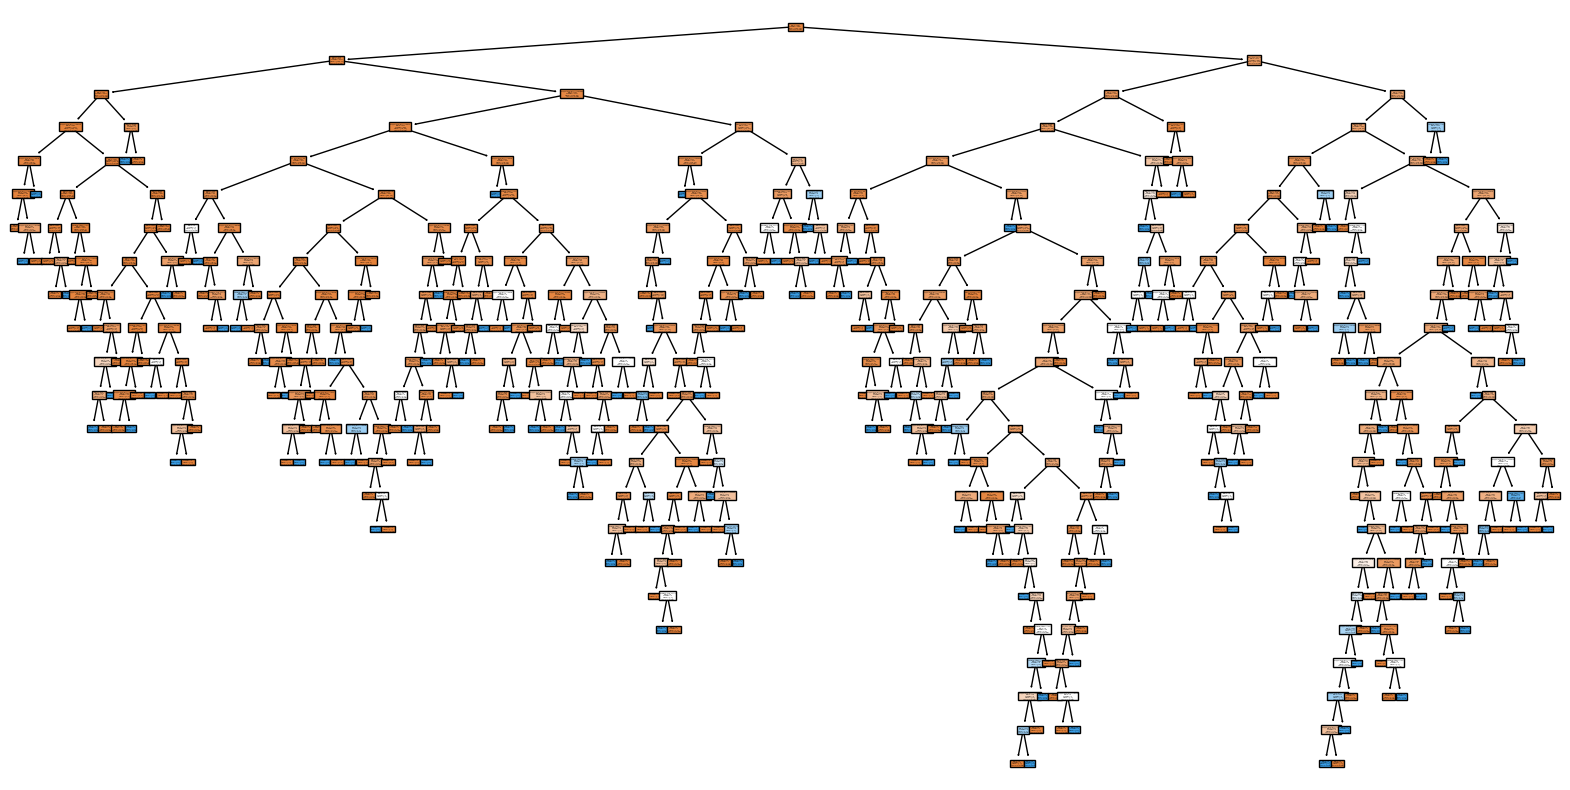

In [29]:
# plot tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.show()

In [30]:
cf_matrix3 = confusion_matrix(y_test, y_pred)
cf_matrix3

array([[913,  47],
       [ 49,  13]], dtype=int64)

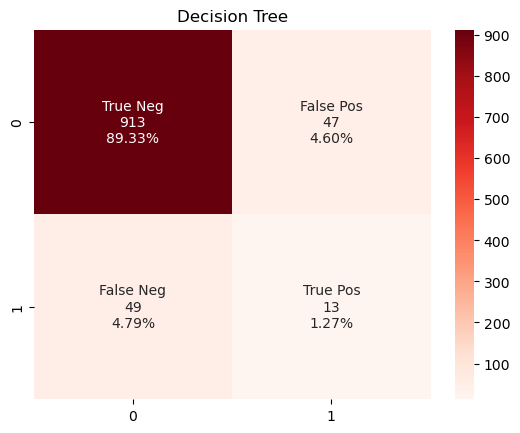

In [31]:
# CONFUSION MATRIX VISUALIZATION [COMPLEX]

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix3.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix3, annot = labels, fmt = '', cmap = 'Reds')
plt.title('Decision Tree')
plt.show()

In [32]:
importance = clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

             Feature  Importance
7  avg_glucose_level    0.364786
1                age    0.209178
8                bmi    0.198718
9     smoking_status    0.105119
0             gender    0.036708
3      heart_disease    0.030406
6     Residence_type    0.022376
2       hypertension    0.013914
5          work_type    0.012357
4       ever_married    0.006437


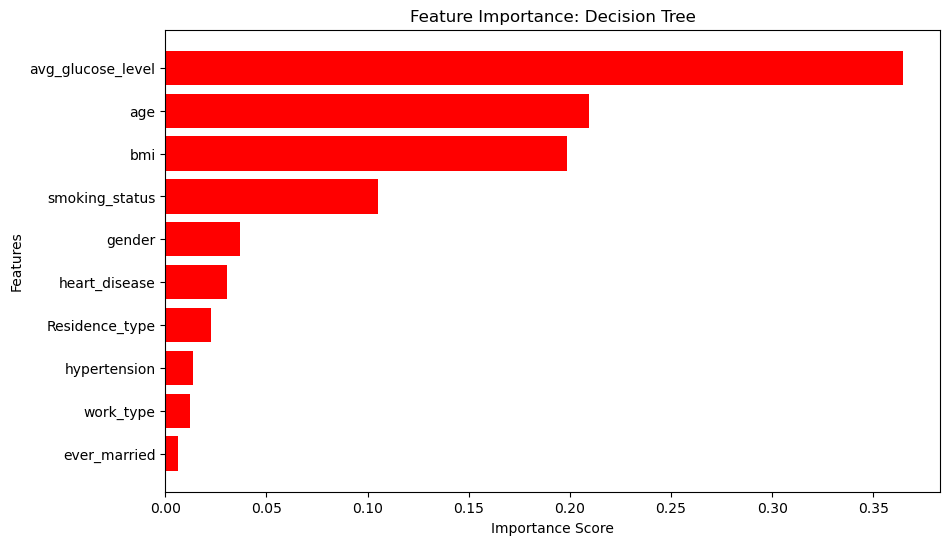

In [47]:
importance = clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=['Red'])
plt.title('Feature Importance: Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,4,1,228.69,36.60,2,1
1,1,61.0,0,0,1,3,0,202.21,28.89,1,1
2,0,80.0,0,1,1,4,0,105.92,32.50,1,1
3,1,49.0,0,0,1,4,1,171.23,34.40,3,1
4,1,79.0,1,0,1,3,0,174.12,24.00,1,1


In [36]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)

In [37]:
# create random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
# fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [40]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9383561643835616


In [41]:
cf_matrix4 = confusion_matrix(y_test, y_pred)
cf_matrix4

array([[959,   1],
       [ 62,   0]], dtype=int64)

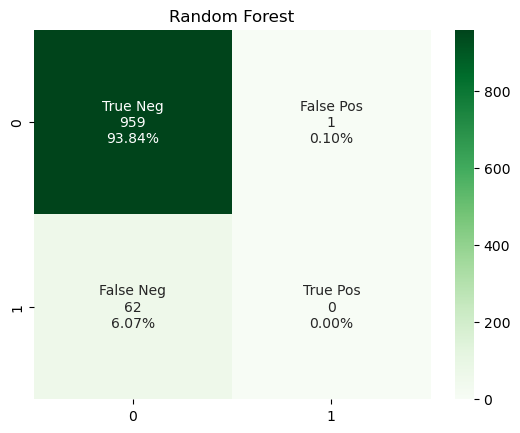

In [42]:
# CONFUSION MATRIX VISUALIZATION [COMPLEX]

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix4.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix4.flatten()/np.sum(cf_matrix4)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix4, annot = labels, fmt = '', cmap = 'Greens')
plt.title('Random Forest')
plt.show()

In [48]:
# Create feature importance df
importance = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=True)
print(importance_df)

             Feature  Importance
4       ever_married    0.019755
3      heart_disease    0.023424
2       hypertension    0.025777
0             gender    0.032416
6     Residence_type    0.034723
5          work_type    0.048683
9     smoking_status    0.067922
1                age    0.227821
8                bmi    0.238392
7  avg_glucose_level    0.281087


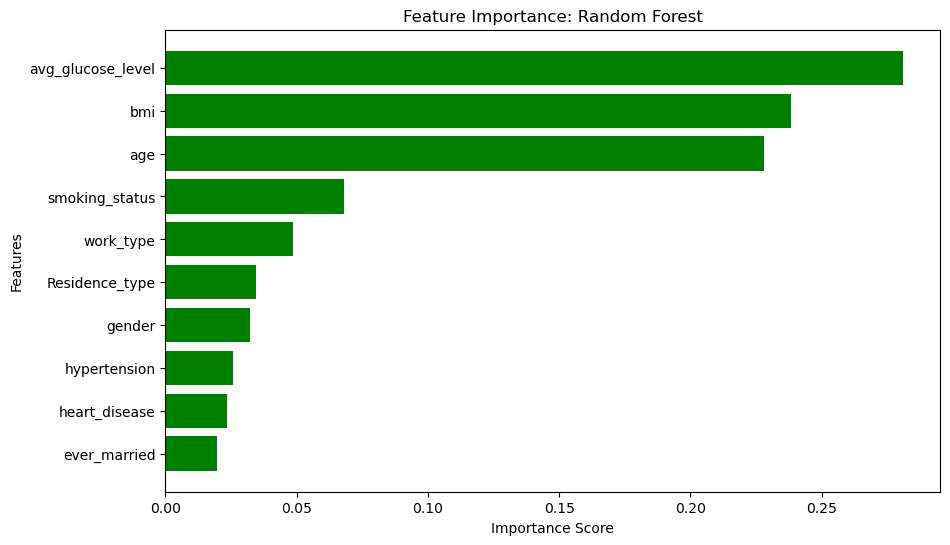

In [49]:
# Visualize feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=['Green'])
plt.title('Feature Importance: Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [45]:
corr = df.corr()

[Text(0.5, 1.0, 'Correlation Matrix')]

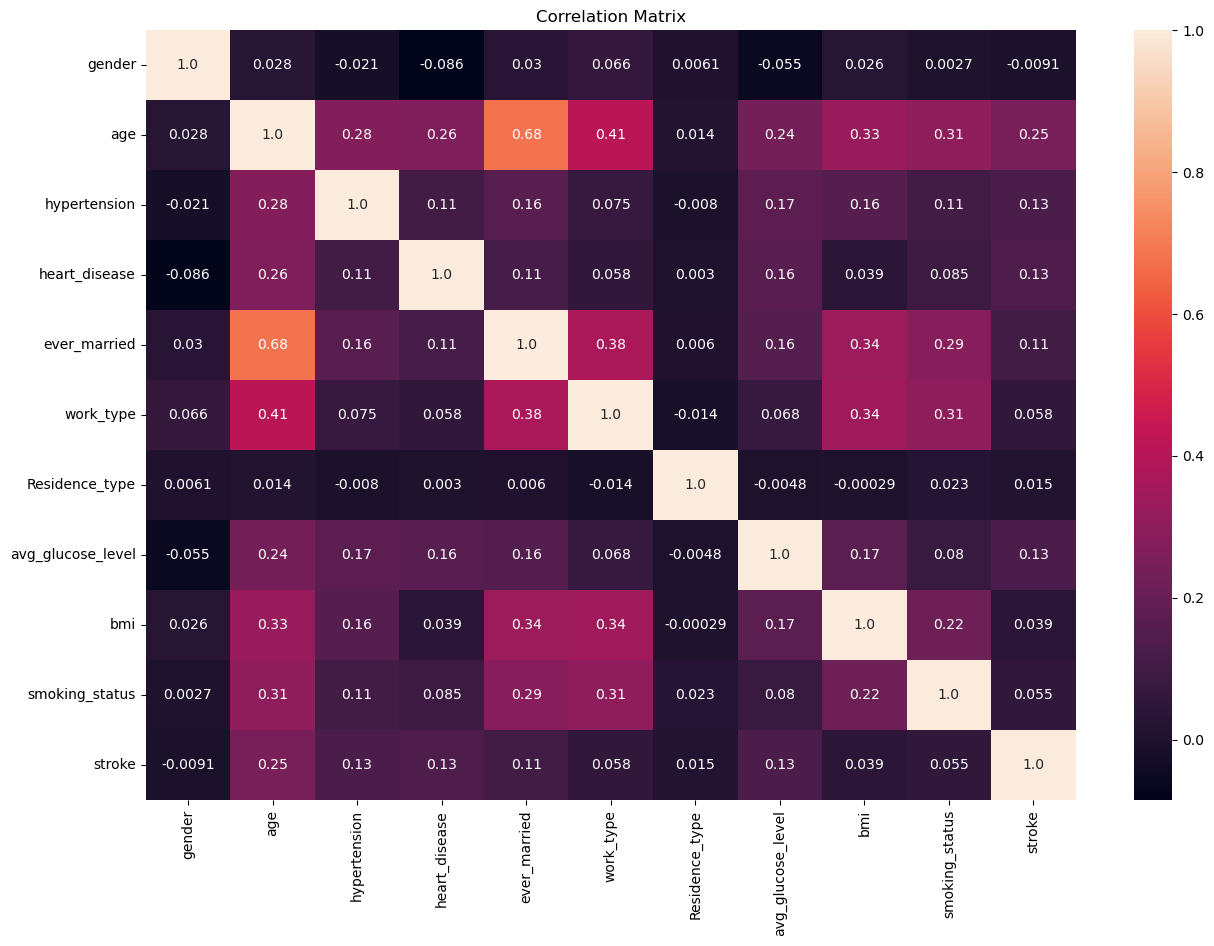

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2').set(title='Correlation Matrix')